In [60]:
# %pip install pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pp
import math
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [63]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [64]:
# check null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [65]:
# check data types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [66]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [67]:
print("Unique values in 'diagnosis' column:")
df['diagnosis'].unique()

Unique values in 'diagnosis' column:


array(['M', 'B'], dtype=object)

In [68]:

px.pie(
    df, 'diagnosis', 
    color = 'diagnosis',
    title = 'Distribution of Diagnosis',
    color_discrete_map={'M': 'red', 'B': 'blue'},
    width=500, height=500
    )


# Inferences :

# Data is clean, no null values
# Data types are appropriate for analysis
# 'diagnosis' column has two unique values: 'M' (Malignant) and 'B' (Benign)
# The dataset contains 569 samples with 30 features
# Dataset is imbalanced (M : B = 63:37)
# There are more cases of benign tumors than malignant tumors
# For imbalanced datasets, accuracy can be a misleading metric
#   for example, if 90% of the cases are benign, the model will always predict "benign" 
#   in such cases, we need "Balanced accuracy"


In [69]:
 # %pip install nbformat>=4.2.0

In [70]:
# visually compare the distribution of each feature

# for malignant tumours versus benign . 

# for a given feature, do its values tend to be different for malignant vs benign cases

for column in df.drop("diagnosis",axis=1).columns[:5]:
    # for loop auto iterates through the first five feature columns in the dataframe
    fig = px.box(data_frame =df ,
                 x='diagnosis',
                 color = 'diagnosis',
                 y = column,
                 color_discrete_sequence = ['#007500','#5CFF5C'],
                 orientation = 'v')

    fig.show()

In [71]:
for column in df.drop("diagnosis",axis=1).columns[5:10]:
    # for loop auto iterates through the first five feature columns in the dataframe
    fig = px.scatter(data_frame =df ,
                 x=column,
                 color = 'diagnosis',
                 color_discrete_sequence = ['#007500','#5CFF5C'],
                 orientation = 'v')

    fig.show()

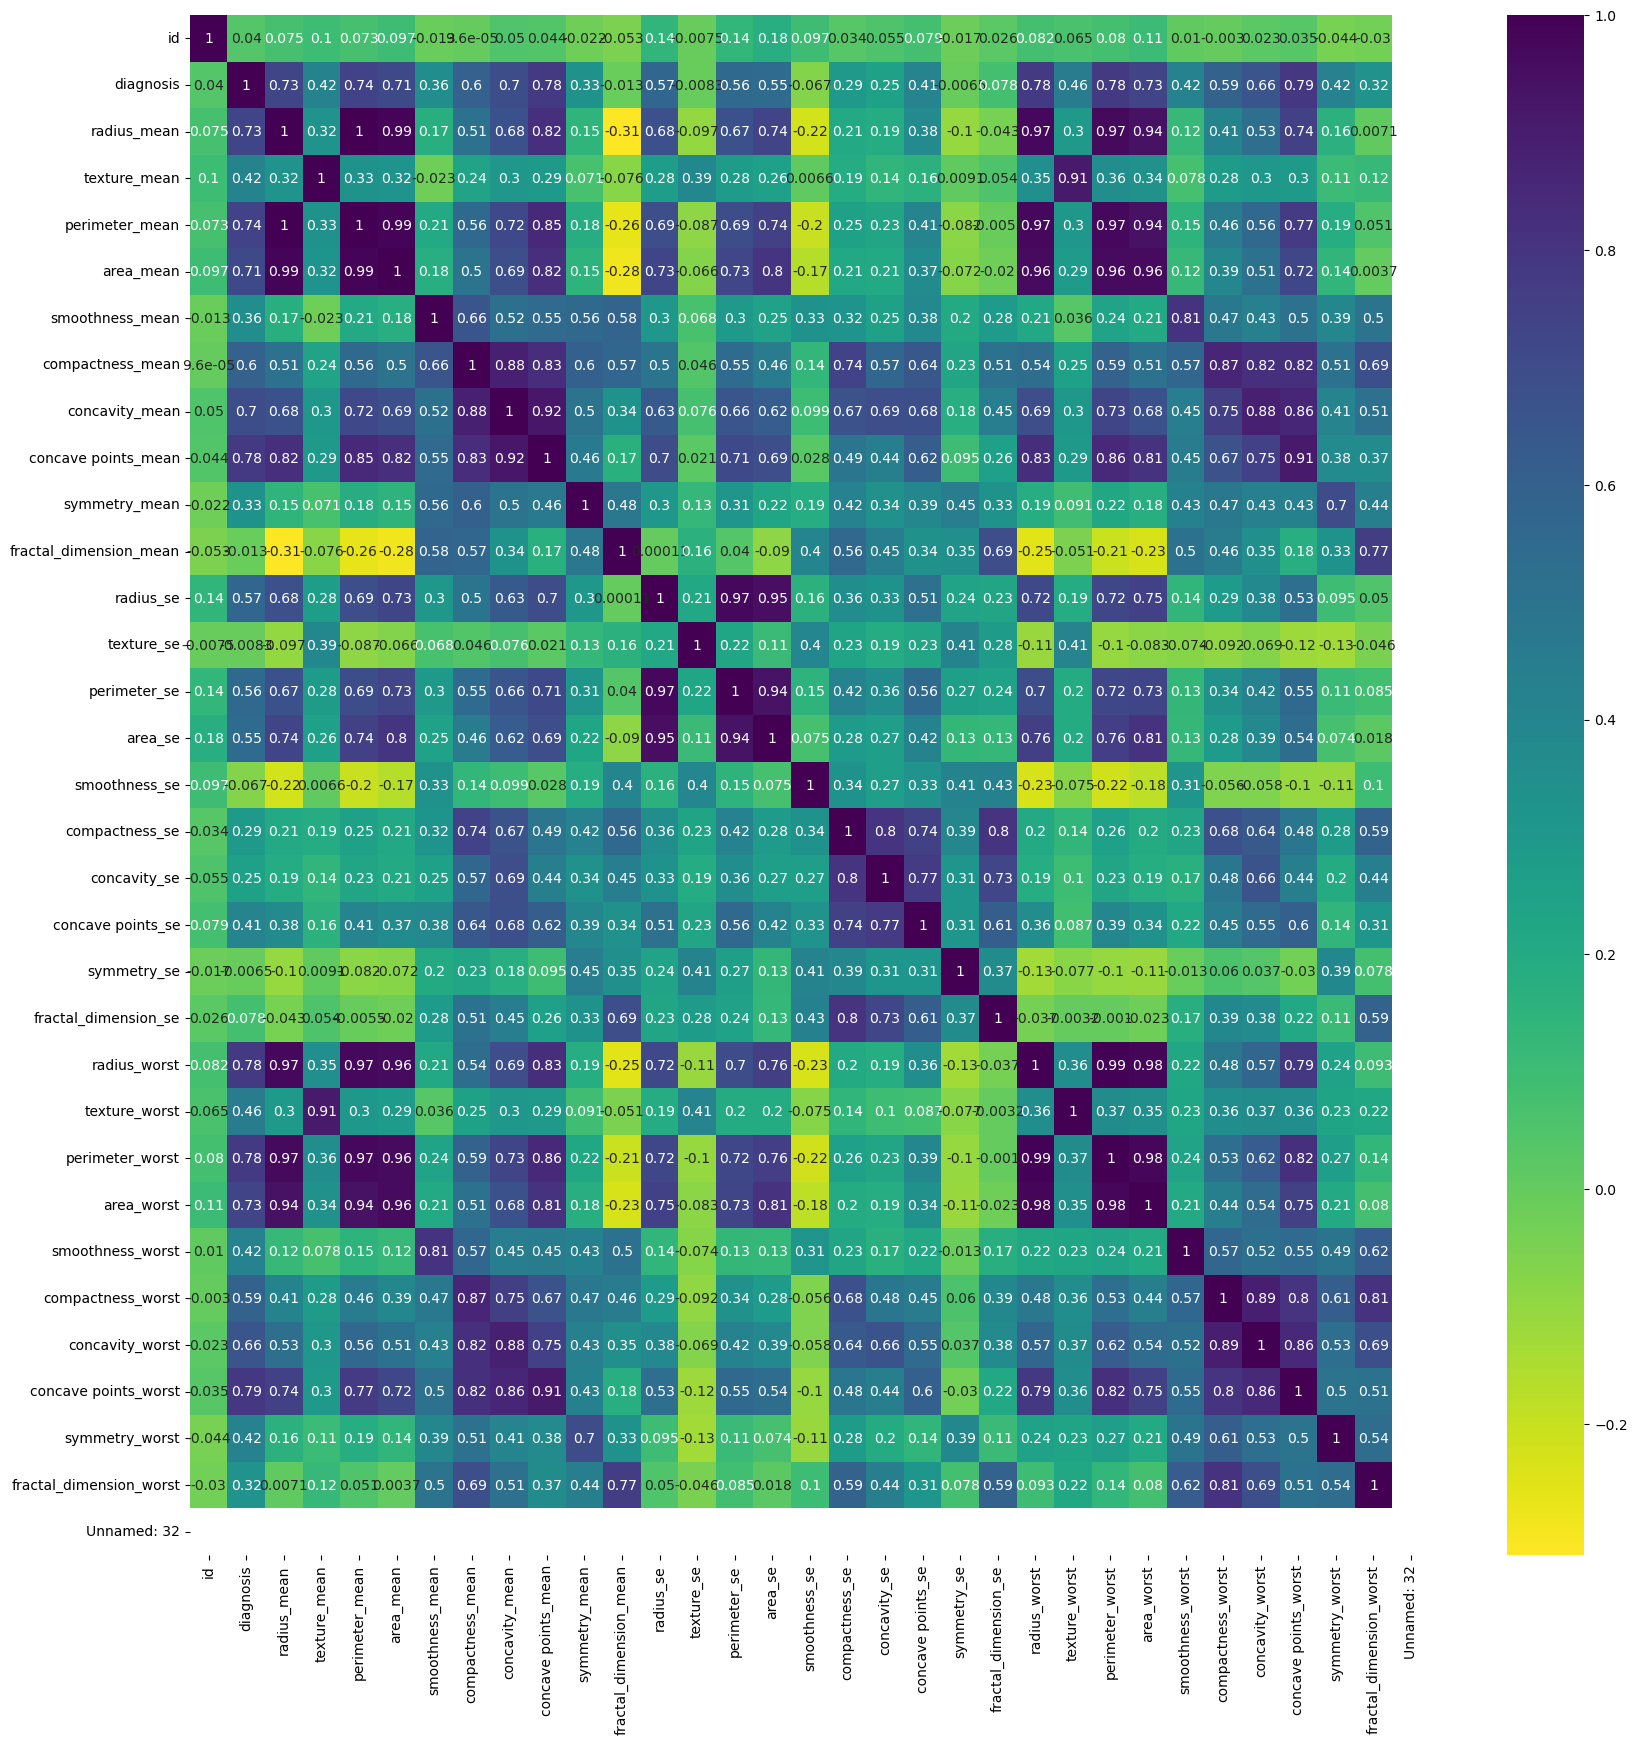

In [72]:
# diagnosis : M or B :categorical

# encode : 1 or 0 :categorical

df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

# this line converts the categorical feature into numerical

# setting M = 1  then B = 0

# take the correlation
corr = df.corr()

plt.figure(figsize = (20,20))

# heatmap 
sns.heatmap(corr , cmap='viridis_r' , annot=True)

plt.show()

# correlation : -1 to 1

Feature Selection

In [73]:
# We should now choose which features are good enough predictors to be used to train the model 
# get the absoulte correlation 

import pprint

cor_target = abs(corr['diagnosis'])

# select better correlated features
# this is the filtering step
# it creates a new list of relevant features
relevant_features = cor_target[cor_target>0.25]

# 0.25 is user defined. It is the hyper-parameter value
# collect the names of features
# list comprehension
names = [index for index,value in relevant_features.items()]

# Drop the target vairable from the results
names.remove("diagnosis")

pprint.pprint(names)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


Assigning Training data and labels


In [74]:
X = df[names].values
y = df['diagnosis'].values.reshape(-1, 1)

print("Features ",X.shape, "Labels ",y.shape)

Features  (569, 25) Labels  (569, 1)


In [75]:
# we need to scale
# Standardize / Z-score normalization
# apply on X

import numpy as np

def scale(X):
    '''
    Parameters : numpy.ndarray) 
    Returns : numpy.ndarray
    '''
    # Calculate the mean and standard deviation of each feature
    # along the columns (axis=0)
    # mean and std are numpy arrays of shape (n_features,)
    mean = np.mean(X, axis=0)

    std = np.std(X, axis=0)

    # Standardize this data
    X = (X - mean) / std

    # This will scale the data to have mean 0 and standard deviation 1
    # This is useful for many machine learning algorithms
    # that assume the data is centered around 0 and has unit variance
    return X

X = scale(X)
# X is now standardized
display(X)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Model Implementation

In [76]:
# We will start with all the examples at the Root Nodes

# Then we will calculate the Information Gain for each feature / Gini Index for each feature

# then we will pick the feature with the highest Information Gain / Gini Index

# then we will split the data according to selected feature

# we will repeat this process until we reach the stopping criteria

# Node Class

class Node:
    '''
    A class representing a Node in a Decision Tree.
    '''
    def __init__(self, feature=None, threshold=None, left=None, right=None,gain = None, value=None):
        '''
        Initializes a Node.

        Parameters:
        - feature: The index of the feature to split on.
        - threshold: The threshold value for the split. Defaults to None
        - left: The left child Node. Defaults to None
        - right: The right child Node. Defaults to None
        - value: The class label if it's a leaf node.

        '''
        # Initialize the Node with the given parameters
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value   
        
'''
Explanation : 

self.threshold = threshold
self.feature = feature 

The above two are used by Decision Nodes.
They store the question being asked at this node .
For example , "Is the radius_mean < 15.5 ? "

 
self.left = left and self.right = right

Used by decision nodes to point to the left and right child nodes.  
They are also called pointer nodes.


self.value = value

used  by leaf nodes to store the class label.
If a node is a final endpoint . it does not ask any questions
it holds predicted class label or prediciton for each branch

self.value will be 0(Benign)   or 1(Malignant) for leaf nodes.


self.gain = gain

Used by Decision Nodes to store the Information Gain or Gini Index of the split.

'''

'\nExplanation : \n\nself.threshold = threshold\nself.feature = feature \n\nThe above two are used by Decision Nodes.\nThey store the question being asked at this node .\nFor example , "Is the radius_mean < 15.5 ? "\n\n \nself.left = left and self.right = right\n\nUsed by decision nodes to point to the left and right child nodes.  \nThey are also called pointer nodes.\n\n\nself.value = value\n\nused  by leaf nodes to store the class label.\nIf a node is a final endpoint . it does not ask any questions\nit holds predicted class label or prediciton for each branch\n\nself.value will be 0(Benign)   or 1(Malignant) for leaf nodes.\n\n\nself.gain = gain\n\nUsed by Decision Nodes to store the Information Gain or Gini Index of the split.\n\n'

In [77]:
class DesicionTree:
    '''
    This is a decision tree classifier.
    It builds a decision tree from the training data.
    It can predict the class label for new data points.
    '''
    
    def __init__(self, min_samples = 2, max_depth = 3):
        self.min_samples = min_samples
        self.max_depth = max_depth
        
    
    def split(self, dataset, feature, threshold):
        '''
        Splits the dataset into two subsets based on the feature and threshold.
        
        Parameters:
        - dataset: The dataset to split
        - feature: The index of the feature to split on
        - threshold: The threshold value for the split
        
        Returns:
        - left: The left subset of the dataset with values less than the threshold
        - right: The right subset of the dataset with values greater than or equal to the threshold
        '''
        
        left_dataset = []
        right_dataset = []
        # Iterate through each row in the dataset
        for row in dataset:
            # If the value of the feature is less than the threshold, add it to the left subset
            if row[feature] < threshold:
                left_dataset.append(row)
            # Otherwise, add it to the right subset
            else:
                right_dataset.append(row)
                
        # Convert the left dataset and right dataset to numpy arrays
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        
        return left_dataset, right_dataset


# write function to calculate Entropy
    def entropy(self, y):
        '''
        Calculates the entropy of the class labels.
        Entropy is a measure of the uncertainty in the class labels.
        Entropy suggests impurity or disorder in the dataset.
        
        Parameters:
        - y: The class labels of the dataset
        
        Returns:
        - entropy: The entropy of the class labels
        '''
        
        entropy = 0.0
        
        # use numpy's unique function to get the unique class labels and their counts
        labels = np.unique(y)
        
        for label in labels:
            
            # find examples in y that match the current label
            # this will give us the examples that belong to the current label
            # we will use this to calculate the probability of the current label
            label_examples = y[y == label]
            
            # calculate the ratio of current labe in y
            pl = len(label_examples) / len(y)
            
            # calculate the entropy for the current label and ratio
            entropy += -pl * np.log2(pl) if pl > 0 else 0
            # (pl > 0) this is to avoid log(0) which is undefined
            
            return entropy
    
# write function to calculate Gini Index / Information Gain
    def gini_index(self, parent, left, right):
        '''
        Calculates the Gini Index of the class labels.
        Gini Index is a measure of impurity in the class labels.
        Computes the information gain from splitting the parent dataset into two subsets.
        
        Parameters:
        parent(ndarray): Input parent dataset
        left : left subset of the dataset
        right : right subset of the dataset
        
        Returns:
        - gini: The Gini Index of the class labels
        '''
        
        # Initialize the information gain to 0
        information_gain = 0.0
        
        # compute the entropy of the parent dataset
        parent_entropy = self.entropy(y)
        
        # weights for the left and right subsets
        weight_left = len(left) / len(parent)
        weight_right = len(right) / len(parent)
        
        # calculate the entropy of the left and right datasets/nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)
        
        # calculate weighted entropy
        # weighted entropy = post split entropy
        # weighted entropy is the sum of the weighted entropies of the left and right subsets
        # where the weights are the proportion of examples in each subset
        weighted_entropy = (weight_left * entropy_left) + (weight_right * entropy_right)
        
        # calculate the information gain
        # information gain = pre split entropy - post split entropy
        information_gain = parent_entropy - weighted_entropy
        
        return information_gain
    
    
    

In [78]:
# write function to get the best split
def best_split(self, dataset, num_samples, num_features):
    '''
    Finds the best feature and threshold to split the dataset.
    
    Parameters:
    - dataset: The dataset to split
    - num_samples: The number of samples in the dataset
    - num_features: The number of features in the dataset
    
    Returns:
    dict: A dictionary containing the best feature index, threshold value, and information gain
    '''
    best_split = {'gain': -1, 'feature': None, 'threshold': None}

    # loop over all features
    for feature_index in range(num_features):
        # get all unique values of the feature
        thresholds = np.unique(dataset[:, feature_index])
        
        for threshold in thresholds:
            # split the dataset based on the current feature and threshold
            left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
            
            # if either subset is empty, skip this split
            if len(left_dataset) == 0 and len(right_dataset) == 0:
            # get y values of the parent and right, left nodes
                y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                # compute information gain based on the y values
                information_gain = self.information_gain(y, left_y, right_y)
                # update the best split if conditions are met
            
            # if this gain is better than the best gain found so far, update the best gain and corresponding feature and threshold
            if information_gain > best_split['gain']:
                best_split['gain'] = information_gain
                best_split['feature'] = feature_index
                best_split['threshold'] = threshold
                best_split['left'] = left_dataset
                best_split['right'] = right_dataset
    return best_split

    
    

In [79]:
def calculate_leaf_value(self, y):
        """
        Calculates the most occurring value in the given list of y values.

        Args:
            y (list): The list of y values.

        Returns:
            The most occurring value in the list.
        """
        y = list(y)
        #get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value


In [80]:
def build_tree(self, dataset, current_depth=0):
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to build the tree from.
        current_depth (int): The current depth of the tree.

        Returns:
        Node: The root node of the built decision tree.
        """
        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples and current_depth <= self.max_depth:
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
                # continue splitting the left and the right child. Increment current depth
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                # return decision node
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node value
        return Node(value=leaf_value)


In [81]:
def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        """
        dataset = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(dataset)


In [82]:
def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels.
        """
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        np.array(predictions)
        return predictions


In [83]:
def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector.

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.

        Returns:
        The predicted target value for the given feature vector.
        """
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None:
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)